In [76]:
model_path = "/home/adham.ibrahim/Emo_Rec/HuBert/multimodal__trained_model_V5_110epochs"
from transformers import Wav2Vec2Model, HubertModel, HubertForSequenceClassification, Wav2Vec2Processor,PretrainedConfig,AutoTokenizer
config = PretrainedConfig.from_pretrained(model_path, num_labels=5)
config.feat_proj_layer_norm = True
config.use_weighted_layer_sum = True
config.classifier_proj_size = 1024
config.mask_time_min_masks = 2
config.mask_time_prob = 0
hubert_model = HubertForSequenceClassification.from_pretrained(model_path,config=config,ignore_mismatched_sizes=True )
#tokenizer = AutoTokenizer.from_pretrained("/home/adham.ibrahim/Emo_Rec/multi_modal/multimodal__trained_model")
from datasets import load_from_disk

# Load the dataset dict from a file
ds = load_from_disk('/home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings')

# convert the Hugging Face Dataset object back to a Pandas DataFrame
df = ds.to_pandas()

import torch.utils.data as data
from datasets import Dataset ,DatasetDict, load_metric
# INTRODUCE TRAIN TEST VAL SPLITS

# 90% train, 10% test + validation
train_testvalid = ds.train_test_split(shuffle=True, test_size=0.1)
# Split the 10% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)
# gather everyone if you want to have a single DatasetDict
ds = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'val': test_valid['train']})


import transformers

from transformers import TrainingArguments

trainer = transformers.Trainer(
    model=hubert_model,
   )

#predicted_labels = trainer.predict(ds["test"]).predicted_labels


Loading cached split indices for dataset at /home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings/cache-0fc18dca6bf91e1f.arrow and /home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings/cache-608e103fc8c1ee09.arrow
Loading cached split indices for dataset at /home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings/cache-47e14a72af4c17d7.arrow and /home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings/cache-b29adca3a9307504.arrow


Accuracy: 96.18%


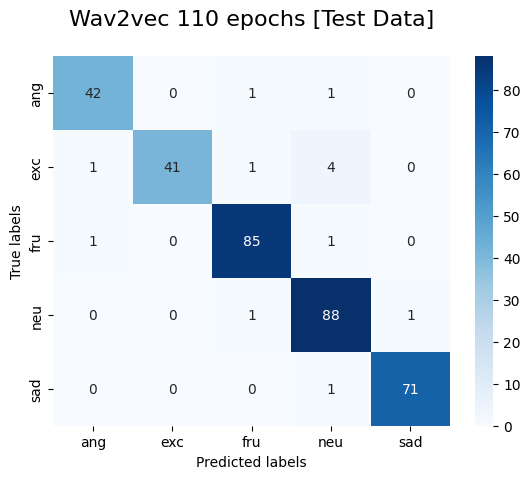

In [86]:
import numpy as np

split = "test"
# Get the predicted labels for the test dataset
predicted_logits = trainer.predict(ds[split]).predictions[0]
predicted_labels = np.argmax(predicted_logits, axis=1)

# # Get the true labels from the test dataset
true_labels = ds[split]["labels"]

from sklearn.preprocessing import LabelEncoder

import pandas as pd
data_speech  =  pd.read_csv('/home/adham.ibrahim/Emo_Rec/IemoCap_embeddings.csv')
le = LabelEncoder()
le.fit(data_speech['emotion'])
decoded_predicted_labels = le.inverse_transform(predicted_labels)
decoded_true_labels = le.inverse_transform(true_labels)
# # Calculate the number of correct predictions
num_correct_predictions = (decoded_predicted_labels == decoded_true_labels).sum()

# Calculate the total number of predictions
total_predictions = len(ds[split])

# Calculate the accuracy as a percentage
accuracy = (num_correct_predictions / total_predictions) * 100
test_acc = accuracy
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy))

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create the confusion matrix
cm = confusion_matrix(decoded_true_labels, decoded_predicted_labels)

# create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues" , xticklabels=le.classes_, yticklabels=le.classes_)
# add text to the top of the plot
plt.text(0.5, 1.1, 'Wav2vec 110 epochs [Test Data]', fontsize=16, ha='center', va='center', transform=plt.gca().transAxes)


plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# save the heatmap to a file
plt.savefig('/home/adham.ibrahim/Emo_Rec/Results/wav2vec_110epochs/Test.png')
plt.show()

Accuracy: 94.96%


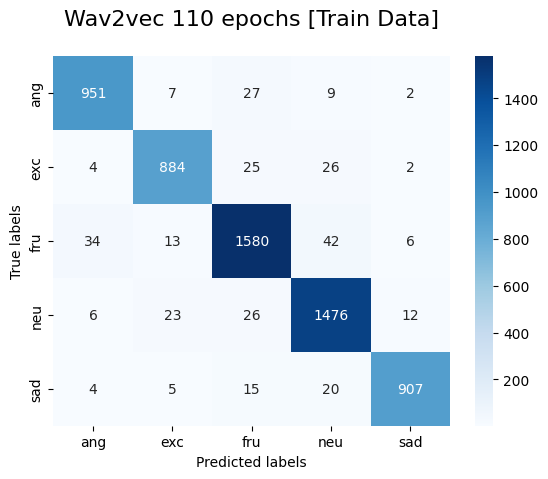

In [87]:
import numpy as np

split = "train"
# Get the predicted labels for the test dataset
predicted_logits = trainer.predict(ds[split]).predictions[0]
predicted_labels = np.argmax(predicted_logits, axis=1)

# # Get the true labels from the test dataset
true_labels = ds[split]["labels"]

from sklearn.preprocessing import LabelEncoder
import pandas as pd
data_speech  =  pd.read_csv('/home/adham.ibrahim/Emo_Rec/IemoCap_embeddings.csv')
le = LabelEncoder()
le.fit(data_speech['emotion'])
decoded_predicted_labels = le.inverse_transform(predicted_labels)
decoded_true_labels = le.inverse_transform(true_labels)
# # Calculate the number of correct predictions
num_correct_predictions = (decoded_predicted_labels == decoded_true_labels).sum()

# # Calculate the number of correct predictions
num_correct_predictions = (predicted_labels == true_labels).sum()

# Calculate the total number of predictions
total_predictions = len(ds[split])

# Calculate the accuracy as a percentage
accuracy = (num_correct_predictions / total_predictions) * 100
train_acc = accuracy
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy))


import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create the confusion matrix
cm = confusion_matrix(decoded_true_labels, decoded_predicted_labels)

# create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt='d' , xticklabels=le.classes_, yticklabels=le.classes_)
plt.text(0.5, 1.1, 'Wav2vec 110 epochs [Train Data]', fontsize=16, ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.savefig('/home/adham.ibrahim/Emo_Rec/Results/wav2vec_110epochs/Train.png')
plt.show()


Accuracy: 95.87%


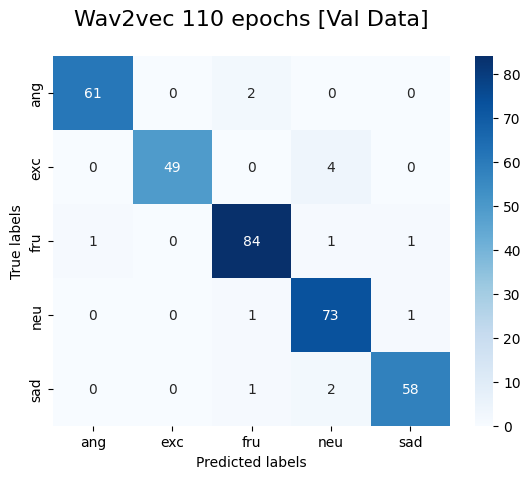

In [88]:
import numpy as np

split = "val"
# Get the predicted labels for the test dataset
predicted_logits = trainer.predict(ds[split]).predictions[0]
predicted_labels = np.argmax(predicted_logits, axis=1)

# # Get the true labels from the test dataset
true_labels = ds[split]["labels"]


from sklearn.preprocessing import LabelEncoder
import pandas as pd
data_speech  =  pd.read_csv('/home/adham.ibrahim/Emo_Rec/IemoCap_embeddings.csv')
le = LabelEncoder()
le.fit(data_speech['emotion'])
decoded_predicted_labels = le.inverse_transform(predicted_labels)
decoded_true_labels = le.inverse_transform(true_labels)
# # Calculate the number of correct predictions
num_correct_predictions = (decoded_predicted_labels == decoded_true_labels).sum()

# # Calculate the number of correct predictions
num_correct_predictions = (predicted_labels == true_labels).sum()

# Calculate the total number of predictions
total_predictions = len(ds[split])

# Calculate the accuracy as a percentage
accuracy = (num_correct_predictions / total_predictions) * 100
val_acc = accuracy
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy))


import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create the confusion matrix
cm = confusion_matrix(decoded_true_labels, decoded_predicted_labels)

# create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues" , xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.text(0.5, 1.1, 'Wav2vec 110 epochs [Val Data]', fontsize=16, ha='center', va='center', transform=plt.gca().transAxes)

# Save the plot to a specific path
plt.savefig("/home/adham.ibrahim/Emo_Rec/Results/wav2vec_110epochs/Val.png")
plt.show()
# Close the plot


In [80]:
print("train_acc",train_acc)
print("val_acc",val_acc)
print("test_acc",test_acc)


train_acc 91.17261709793645
val_acc 88.49557522123894
test_acc 91.76470588235294


wav2vec model

In [85]:
model_path = "/home/adham.ibrahim/Emo_Rec/wav2vec_model/multimodal_wav2vec_model_V3_110epochs"
from transformers import Wav2Vec2Config,Wav2Vec2ForSequenceClassification,Wav2Vec2Model, HubertModel, HubertForSequenceClassification, Wav2Vec2Processor,PretrainedConfig,AutoTokenizer

NUM_LABELS = 5
config = Wav2Vec2Config.from_pretrained(model_path, num_labels=NUM_LABELS)
config.feat_proj_layer_norm = True
config.use_weighted_layer_sum = True
config.classifier_proj_size = 1024
config.mask_time_min_masks = 2
config.mask_time_prob = 0
wav2vec_model = Wav2Vec2ForSequenceClassification.from_pretrained(model_path,config=config,ignore_mismatched_sizes=True )
#tokenizer = AutoTokenizer.from_pretrained("/home/adham.ibrahim/Emo_Rec/multi_modal/multimodal__trained_model")
from datasets import load_from_disk

# Load the dataset dict from a file
ds = load_from_disk('/home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings')

# convert the Hugging Face Dataset object back to a Pandas DataFrame
df = ds.to_pandas()

import torch.utils.data as data
from datasets import Dataset ,DatasetDict, load_metric
# INTRODUCE TRAIN TEST VAL SPLITS

# 90% train, 10% test + validation
train_testvalid = ds.train_test_split(shuffle=True, test_size=0.1)
# Split the 10% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)
# gather everyone if you want to have a single DatasetDict
ds = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'val': test_valid['train']})


import transformers
from transformers import TrainingArguments

trainer = transformers.Trainer(
    model=wav2vec_model,
    #args=training_args,
    #train_dataset=ds["train"],  # training dataset
    #eval_dataset=ds["val"],  # evaluation dataset
   
)

#predicted_labels = trainer.predict(ds["test"]).predicted_labels


Loading cached split indices for dataset at /home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings/cache-e0f4569887446897.arrow and /home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings/cache-190f0fc457aed2d3.arrow
Loading cached split indices for dataset at /home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings/cache-020aab21977d57ac.arrow and /home/adham.ibrahim/Emo_Rec/multi_modal/dataset_speech_text_Embeddings/cache-81e89ace945c9026.arrow
